In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import csv
import calendar
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/bank-additional-full.csv',sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**`Observation:`**
There are no null, nan, or missing values in our dataset.




In [ ]:
categorical= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
outputs= 'y'

Text(0.5, 1.0, 'Distribution of classes')

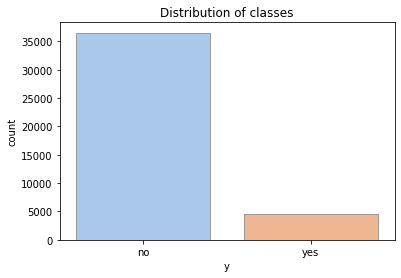

In [ ]:
sns.countplot(x=df['y'],palette = 'pastel', edgecolor = '.6')
plt.title('Distribution of classes')

**`Observation:`**we have a dataset which is highly imbalanced.




In [ ]:
print(df.describe().to_string())

               age      duration      campaign         pdays      previous  emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean      40.02406    258.285010      2.567593    962.475454      0.172963      0.081886       93.575664     -40.502600      3.621291   5167.035911
std       10.42125    259.279249      2.770014    186.910907      0.494901      1.570960        0.578840       4.628198      1.734447     72.251528
min       17.00000      0.000000      1.000000      0.000000      0.000000     -3.400000       92.201000     -50.800000      0.634000   4963.600000
25%       32.00000    102.000000      1.000000    999.000000      0.000000     -1.800000       93.075000     -42.700000      1.344000   5099.100000
50%       38.00000    180.000000      2.000000    999.000000      0.000000      1.100000       93.749000     -41

duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


In [ ]:
df.drop('duration', axis=1, inplace=True)

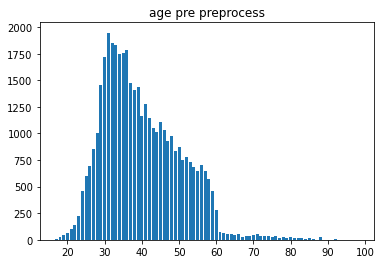

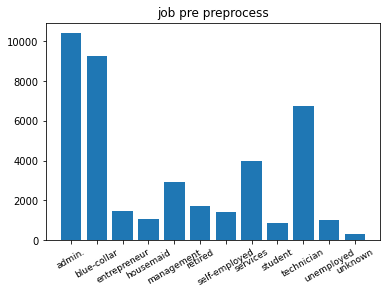

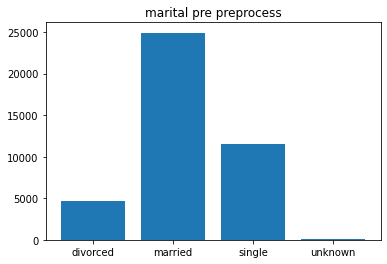

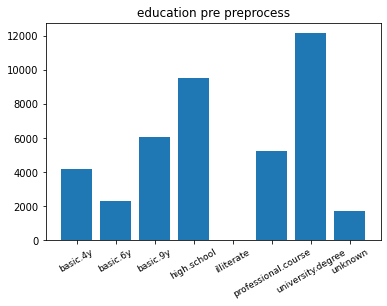

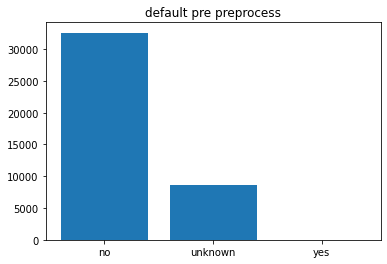

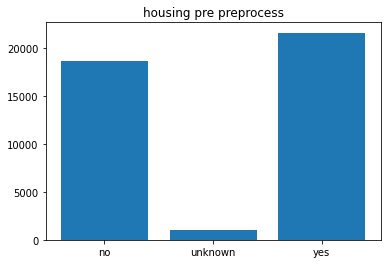

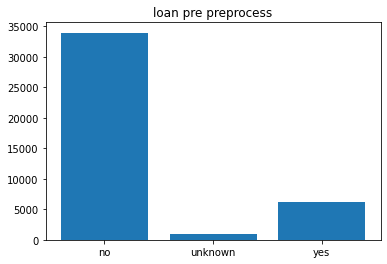

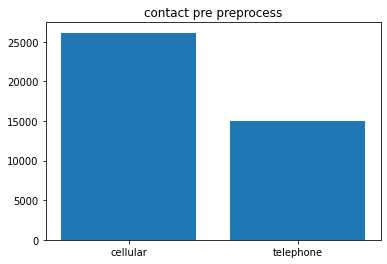

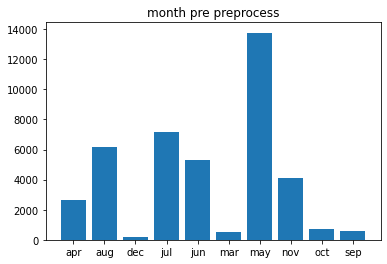

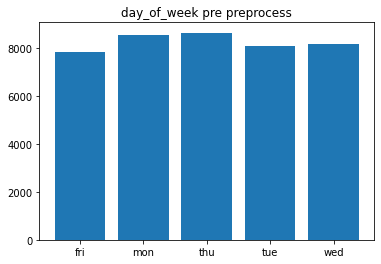

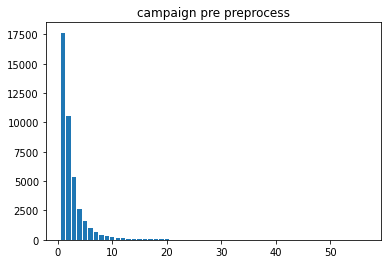

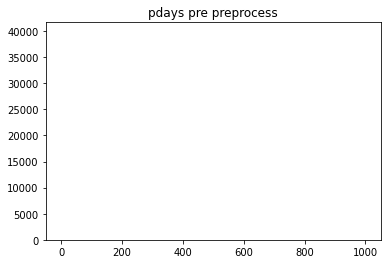

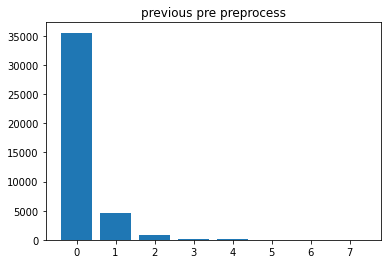

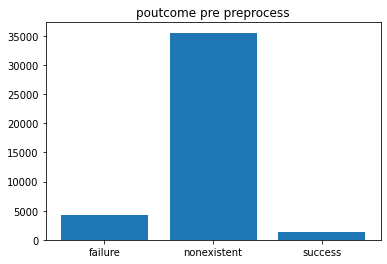

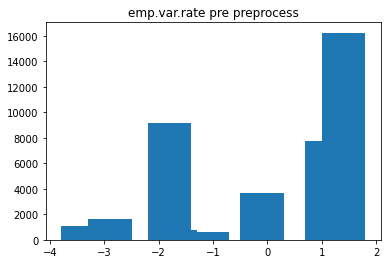

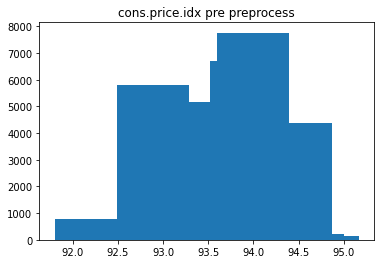

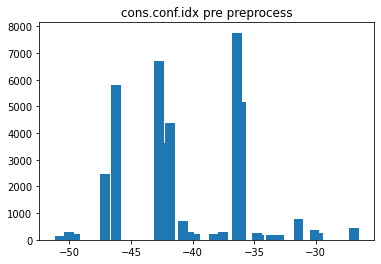

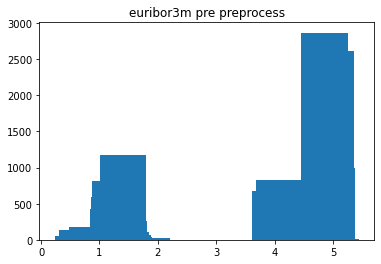

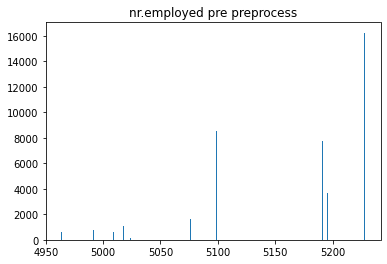

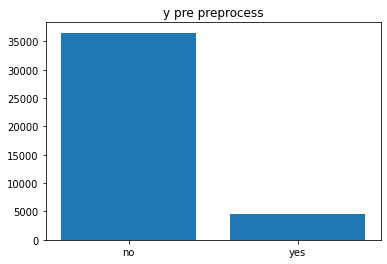

In [ ]:
df['additional'] = 0
for x in df.loc[:, df.columns != 'additional']:
    # print(x)
    test = df.groupby(by=x).agg({'additional': 'size'}).reset_index()
    test.rename(columns={'additional': 'total'}, inplace=True)
    plt.bar(test[x], test['total'], align='center')
    #sns.histplot(test[x],kde=True)
    plt.title(x + ' pre preprocess')
    if x in ('job', 'education'):
        plt.xticks(rotation=30, fontsize=9)
    plt.show()
df.drop('additional', axis=1, inplace=True)

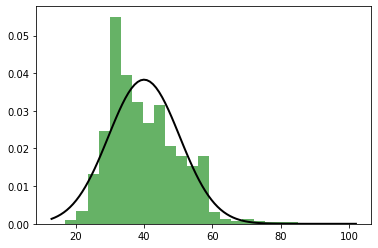

In [ ]:
from scipy.stats import norm
agen=df.loc[:,'age']
mu, std = norm.fit(agen)
plt.hist(agen, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()


Preprocessing
To count correlations between columns and create models, we need to encode categorical values to numbers. Date columns will be mapped in numbers to preserve order. Other categorical values will be one-hot encoded. If there is few values of some category they will be chanded into other value. The Point of it is to reduce the number of columns after one-hot encoding.
Changes in columns:
- default:
  - 'yes' to 'unknown'
  - 'no': 0, 'unknown': 1
- housing:
  - 'unknown' to 'no'
  -'no': 0, 'yes': 1
- loan:
  - 'unknown' to 'no'
  -'no': 0, 'yes': 1
- contact:
  - 'telephone': 1
  - 'celural': 0
- y:
 - 'yes': 1
 - 'no' : 0
- month:
 - 'jan': 1, . . . , 'dec': 12
- day:
 - 'mon': 1, . . . , 'fri' : 5
- marital:
 - 'unknown' to 'married'

In [ ]:
df.loc[(df.default == 'yes'),'default'] = 'unknown'
df.default = (df.default == 'unknown') * 1
df.loc[(df.housing == 'unknown'), 'housing'] = 'no'
df.housing = (df.housing == 'yes') * 1
df.loc[(df.loan == 'unknown'), 'loan'] = 'no'
df.loan = (df.loan == 'yes') * 1
df.loc[(df.marital == 'unknown'), 'marital'] = 'married'
df.contact = (df.contact == 'telephone') * 1
df.y = (df.y == 'yes') * 1
df.month = [list(calendar.month_abbr).index(item.title()) for item in df.month]
df.day_of_week = [list(calendar.day_abbr).index(item.title())+1 for item in df.day_of_week]

enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['marital']]).toarray(),columns=enc.categories_[0])
df = df.join(enc_df)
df = df.drop('marital',axis=1)

enc_df = pd.DataFrame(enc.fit_transform(df[['job']]).toarray(),columns=enc.categories_[0])
df = df.join(enc_df)
df = df.drop('job',axis=1)

enc_df = pd.DataFrame(enc.fit_transform(df[['education']]).toarray(),columns=['education' + '_' + sub for sub in enc.categories_[0]])
df = df.join(enc_df)
df = df.drop('education',axis=1)

enc_df = pd.DataFrame(enc.fit_transform(df[['poutcome']]).toarray(),columns=['poutcome' + '_' + sub for sub in enc.categories_[0]])
df = df.join(enc_df)
df = df.drop('poutcome',axis=1)

# Quantile preprocessing 
https://towardsdatascience.com/the-definitive-way-to-deal-with-continuous-variables-in-machine-learning-edb5472a2538

In [ ]:
df_quantiles = df.copy()
df_quantiles['additional'] = 0
info = df_quantiles.groupby(by='pdays').agg({'additional': 'size'}).reset_index()
info.rename(columns={'additional': 'total'}, inplace=True)
print(info)
# 0 - not contacted before
# 1 - contacted before
df_quantiles['contacted_before'] = np.where(df_quantiles['pdays'] == 999, 0, 1)
info = df_quantiles.groupby(by='contacted_before').agg({'additional': 'size'}).reset_index()
info.rename(columns={'additional': 'total'}, inplace=True)
print(info)
df_quantiles.drop('pdays', axis=1, inplace=True)
df_quantiles.drop('additional', axis=1, inplace=True)

    pdays  total
0       0     15
1       1     26
2       2     61
3       3    439
4       4    118
5       5     46
6       6    412
7       7     60
8       8     18
9       9     64
10     10     52
11     11     28
12     12     58
13     13     36
14     14     20
15     15     24
16     16     11
17     17      8
18     18      7
19     19      3
20     20      1
21     21      2
22     22      3
23     25      1
24     26      1
25     27      1
26    999  39673
   contacted_before  total
0                 0  39673
1                 1   1515


Since almost all entries are for the custommers, who never have been conntacted. To preprocess the data we change it into discrete type with two possible values 0 means, customer has never been contacted, 1 means one has been contacted.

In [ ]:
set = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for x in set:
    vec = np.arange(0.00, 1, 0.05)
    if x in ['emp.var.rate', 'nr.employed']:
        vec = np.arange(0.05, 1, 0.05)
    print(x)
    quantiles = np.quantile(df_quantiles[x], vec)
    quantiles = pd.DataFrame(np.squeeze(quantiles), columns=['values'])
    quantiles['total_percentage'] = 0
    quantiles = quantiles.groupby(by='values').agg({'total_percentage': 'size'}).reset_index()
    quantiles['total_percentage'] *= 5
    quantiles['total_percentage'] = quantiles['total_percentage'].cumsum() - quantiles['total_percentage']
    print(quantiles)
    df_quantiles[x] = pd.qcut(df_quantiles[x].values, 20, duplicates='drop', labels=quantiles['total_percentage'].to_numpy())
    df_quantiles[x] = df_quantiles[x].astype('int64')

age
    values  total_percentage
0     17.0                 0
1     26.0                 5
2     28.0                10
3     30.0                15
4     31.0                20
5     32.0                25
6     33.0                30
7     34.0                35
8     35.0                40
9     37.0                45
10    38.0                50
11    40.0                55
12    41.0                60
13    43.0                65
14    45.0                70
15    47.0                75
16    49.0                80
17    52.0                85
18    55.0                90
19    58.0                95
campaign
   values  total_percentage
0     1.0                 0
1     2.0                45
2     3.0                70
3     4.0                85
4     5.0                90
5     7.0                95
previous
   values  total_percentage
0     0.0                 0
1     1.0                90
emp.var.rate
   values  total_percentage
0    -2.9                 0
1    -1.8           

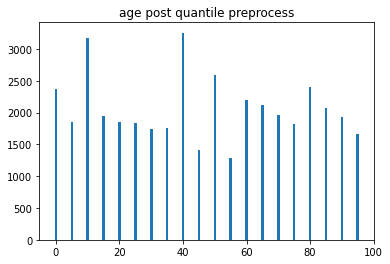

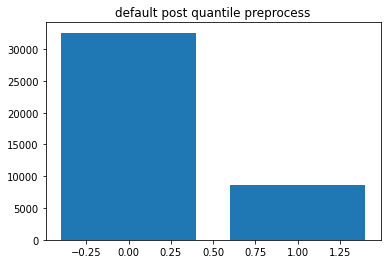

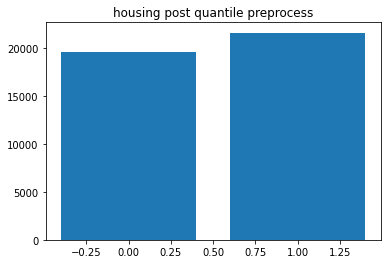

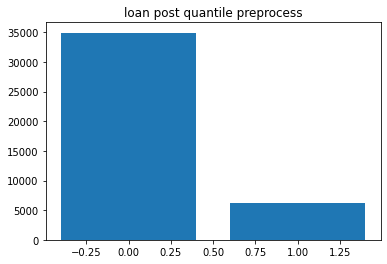

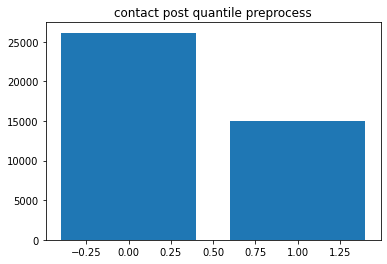

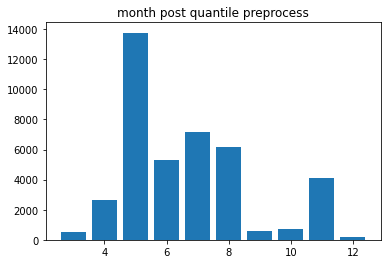

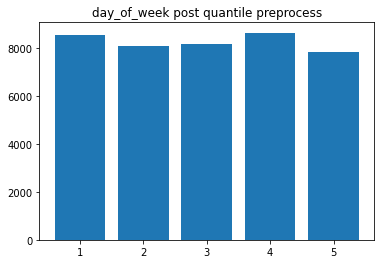

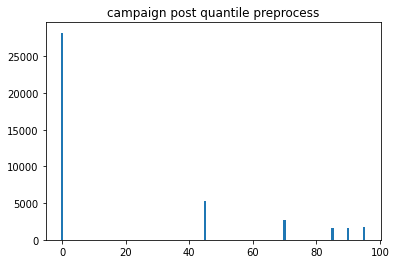

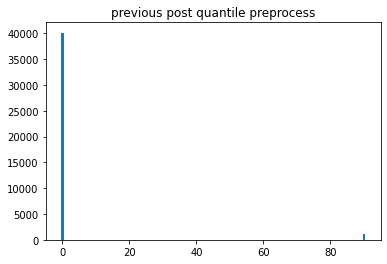

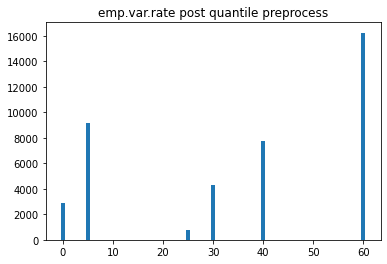

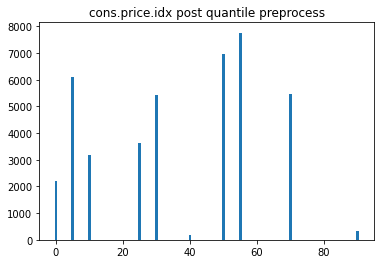

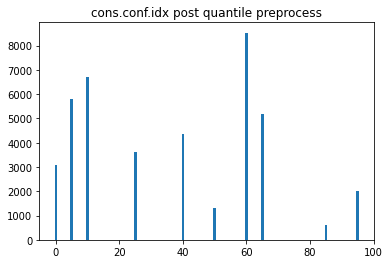

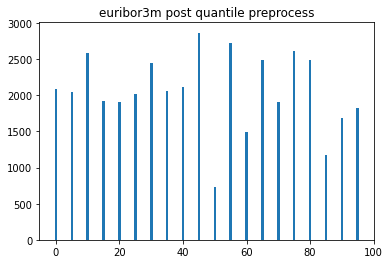

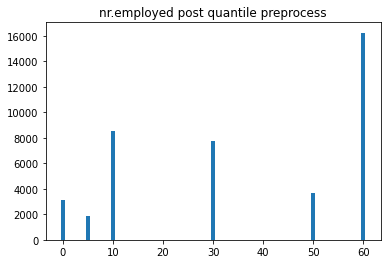

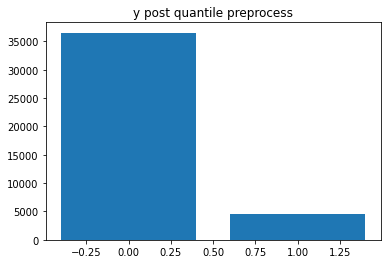

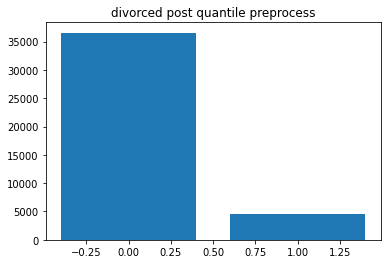

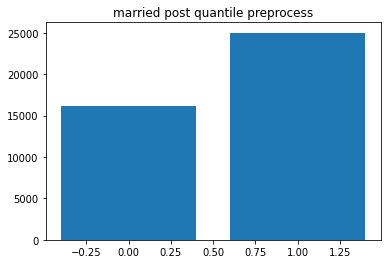

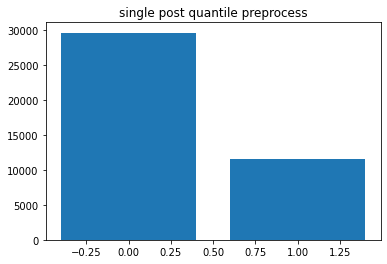

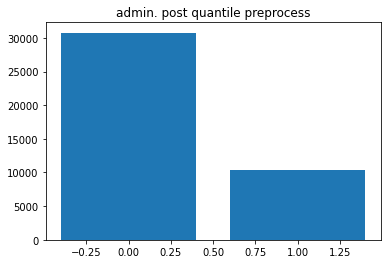

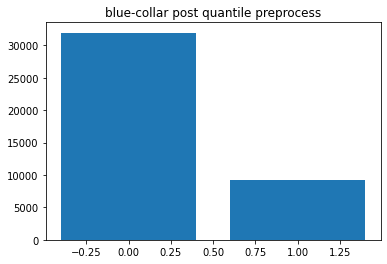

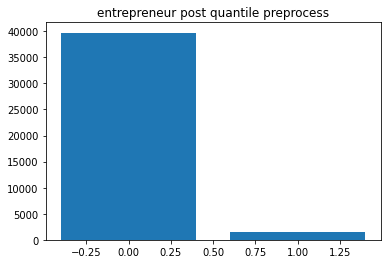

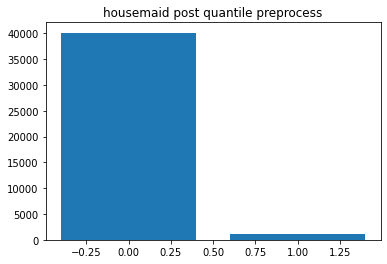

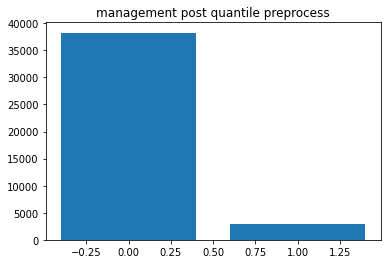

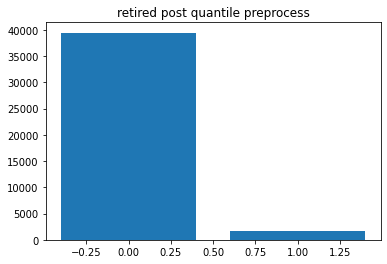

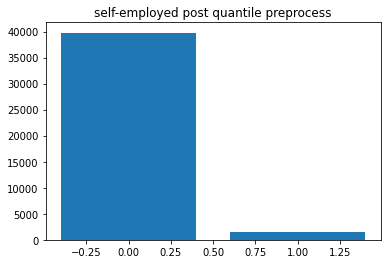

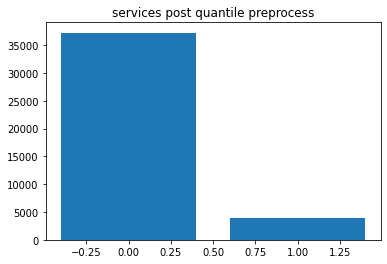

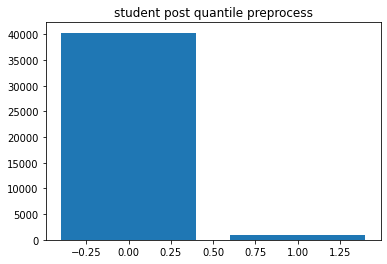

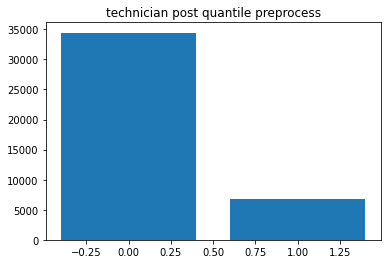

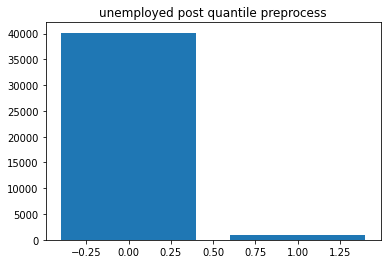

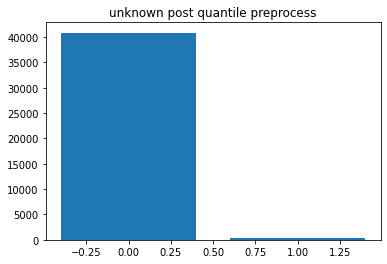

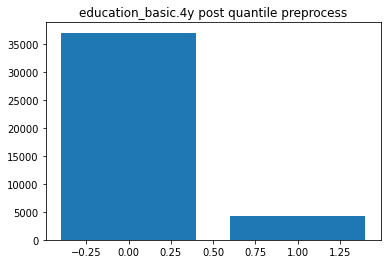

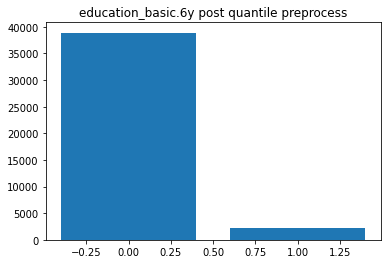

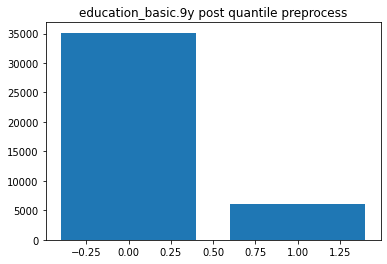

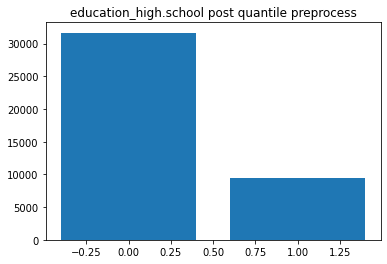

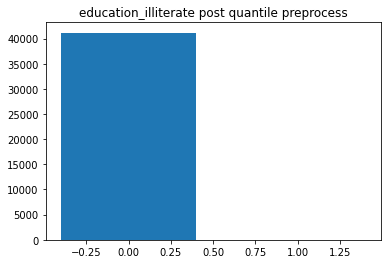

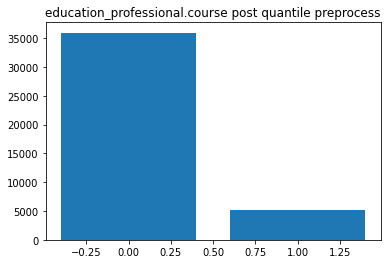

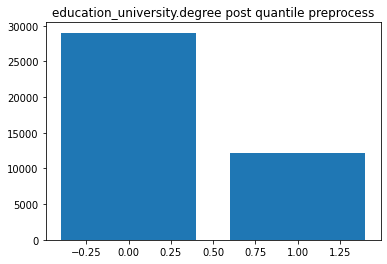

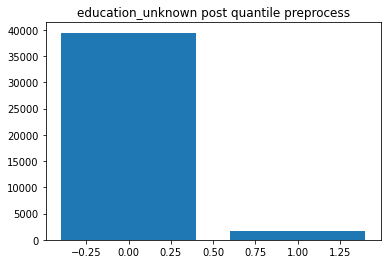

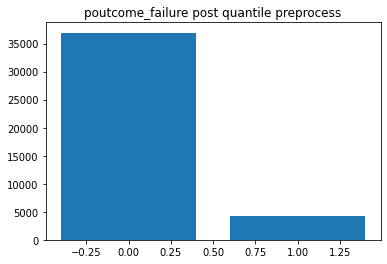

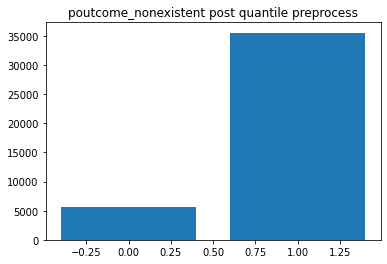

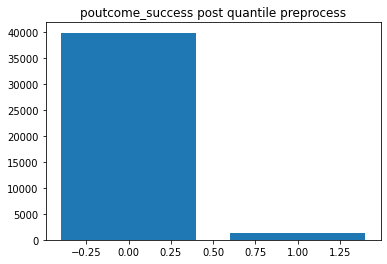

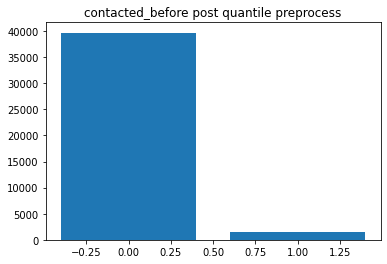

In [ ]:
df_quantiles['additional'] = 0
for x in df_quantiles.loc[:, df_quantiles.columns != 'additional']:
    # print(x)
    test = df_quantiles.groupby(by=x).agg({'additional': 'size'}).reset_index()
    test.rename(columns={'additional': 'total'}, inplace=True)
    plt.bar(test[x], test['total'], align='center')
    plt.title(x + ' post quantile preprocess')
    if x in ('job', 'education'):
        plt.xticks(rotation=30, fontsize=9)
    plt.show()
df_quantiles.drop('additional', axis=1, inplace=True)

In [ ]:
print(df_quantiles.columns)

Index(['age', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'divorced', 'married',
       'single', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'contacted_before'],
      dtype='object')


In [ ]:
with pd.option_context('display.max_columns', 42):
  print(df_quantiles.describe(include='all'))

                age       default       housing          loan       contact  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      46.171579      0.208799      0.523842      0.151695      0.365252   
std       28.962583      0.406455      0.499437      0.358729      0.481507   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       20.000000      0.000000      0.000000      0.000000      0.000000   
50%       45.000000      0.000000      1.000000      0.000000      0.000000   
75%       70.000000      0.000000      1.000000      0.000000      1.000000   
max       95.000000      1.000000      1.000000      1.000000      1.000000   

              month   day_of_week      campaign      previous  emp.var.rate  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       6.607896      2.979581     21.252913      2.324949     35.924177   
std        2.040998      1.411514     33.352643    

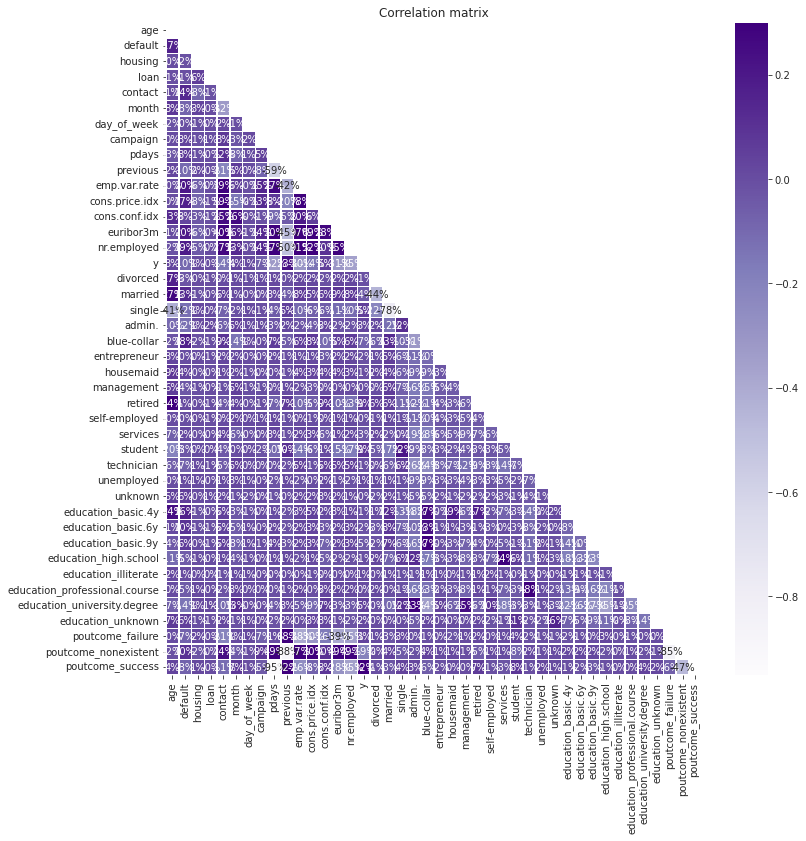

In [ ]:
mask = np.zeros_like(df_quantiles.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('ticks'):
    f, ax = plt.subplots(figsize=(12,12))
    ax = sns.heatmap(df.corr(method ='pearson'), mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False,cmap='Purples')
    plt.title('Correlation matrix')

In [ ]:
df_correlations = df_quantiles.corr().copy()
for x in df_correlations.columns:
    print(x)
    print(df_correlations[x].sort_values(ascending=False)[1:])
    print("\n")

age
retired                          0.314277
married                          0.298224
education_basic.4y               0.219577
default                          0.192191
divorced                         0.166489
cons.conf.idx                    0.108952
housemaid                        0.084563
management                       0.075304
education_unknown                0.066479
month                            0.065276
emp.var.rate                     0.054056
euribor3m                        0.053940
nr.employed                      0.051245
unknown                          0.046107
entrepreneur                     0.043032
cons.price.idx                   0.040252
contact                          0.032139
education_basic.6y               0.025359
education_illiterate             0.016200
poutcome_nonexistent             0.011608
campaign                         0.009189
education_professional.course    0.006445
poutcome_success                 0.004233
self-employed                 

# Standard scale preprocessing

In [ ]:
set = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays']
sc = StandardScaler()
df_standard_scale = df.copy()
for x in set:
    df_standard_scale[x] =sc.fit_transform(df_standard_scale[[x]])

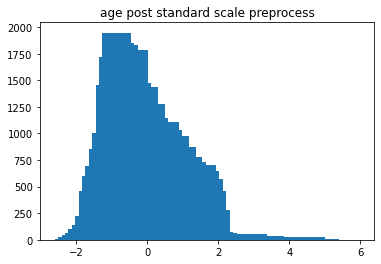

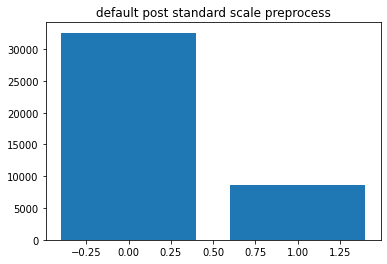

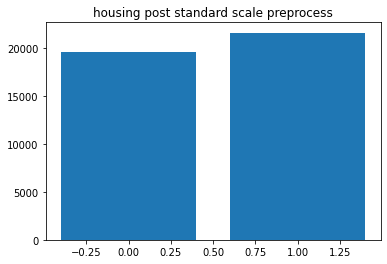

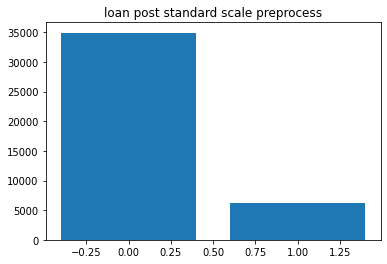

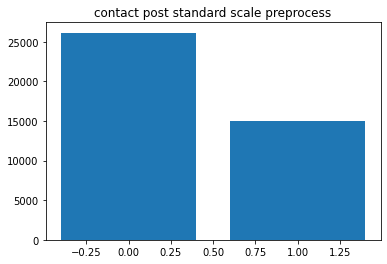

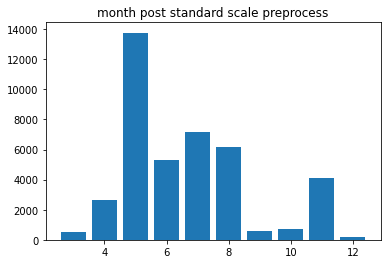

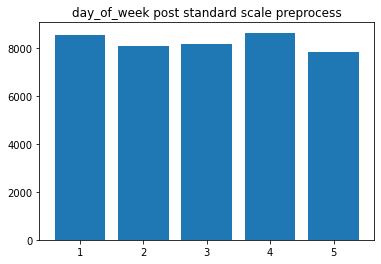

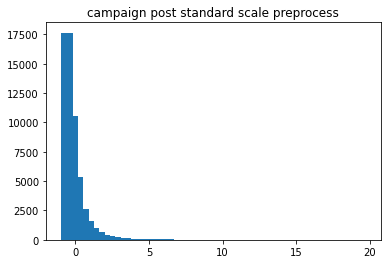

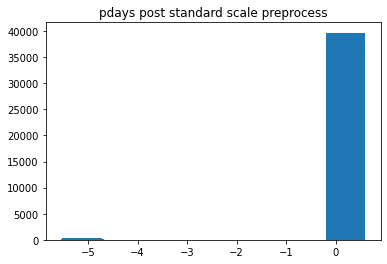

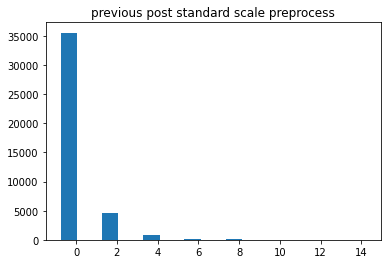

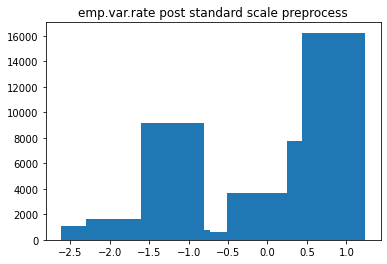

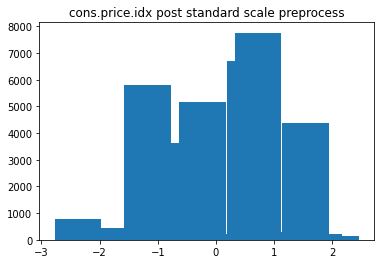

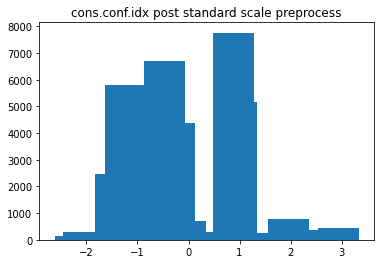

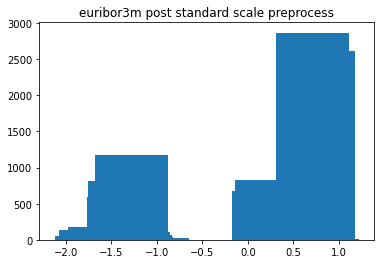

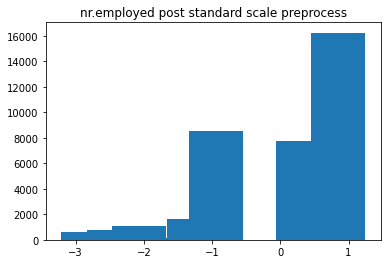

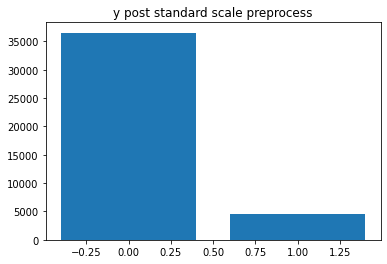

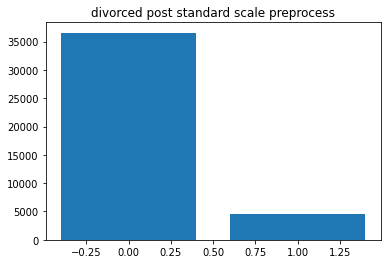

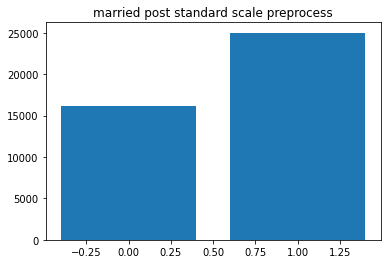

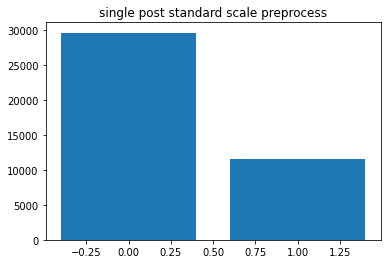

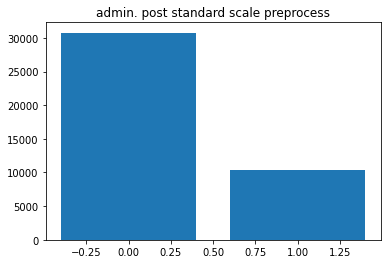

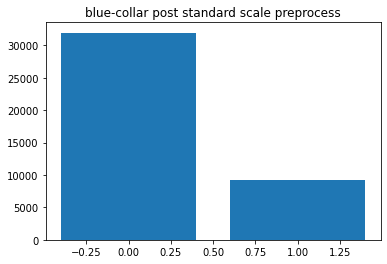

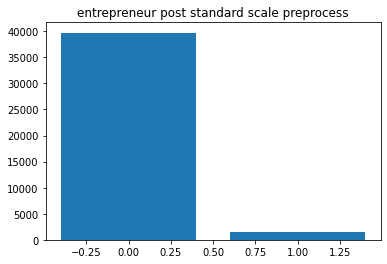

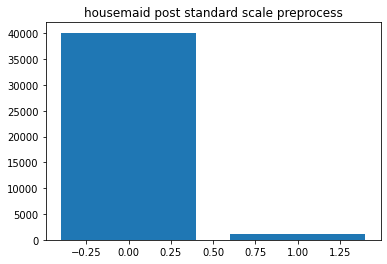

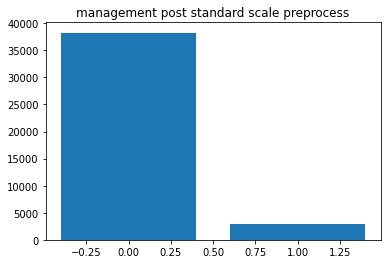

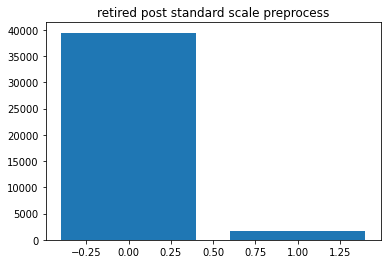

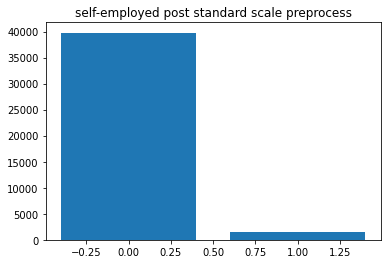

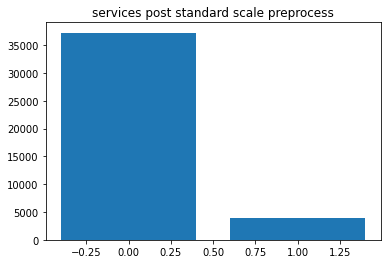

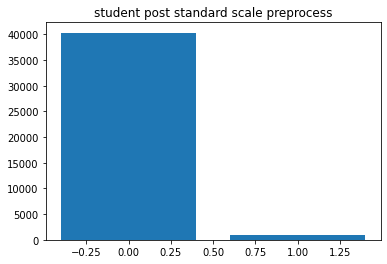

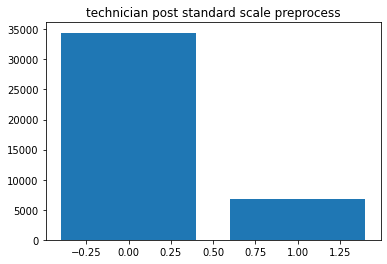

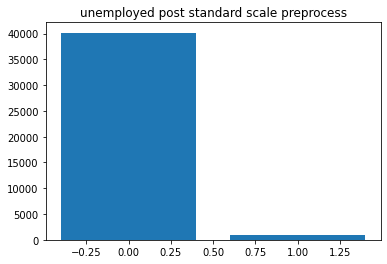

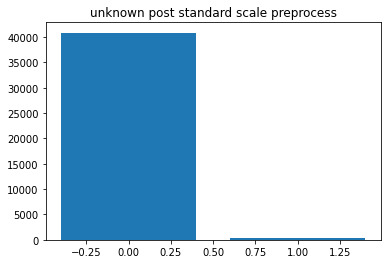

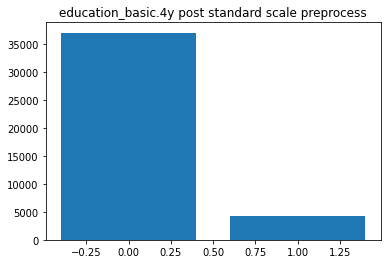

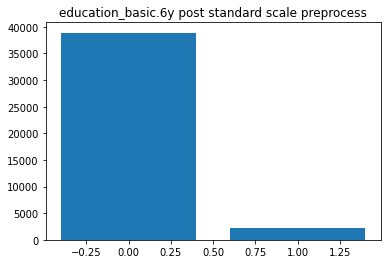

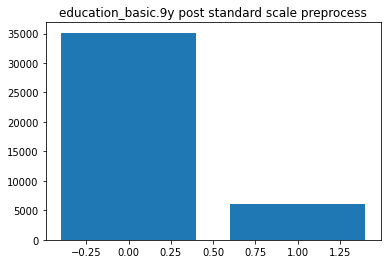

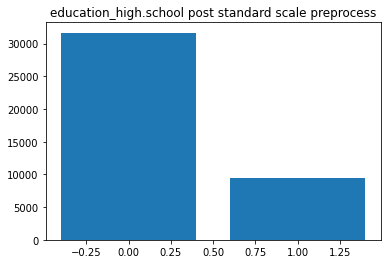

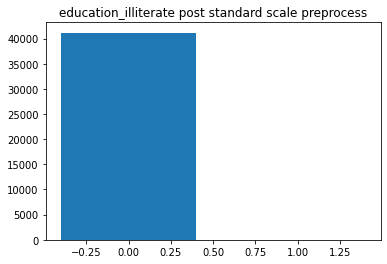

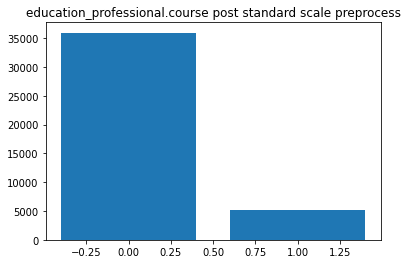

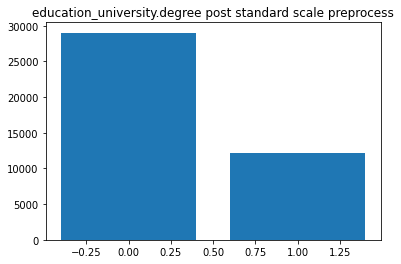

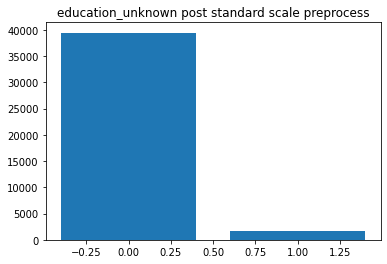

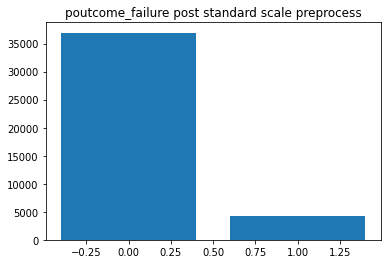

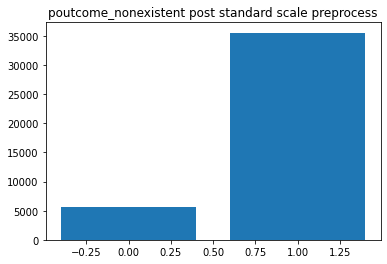

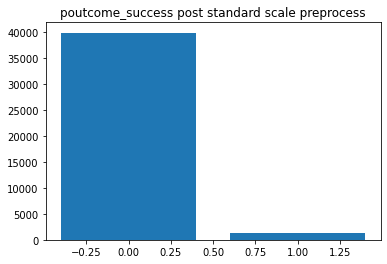

In [ ]:
df_standard_scale['additional'] = 0
for x in df_standard_scale.loc[:, df_standard_scale.columns != 'additional']:
    # print(x)
    test = df_standard_scale.groupby(by=x).agg({'additional': 'size'}).reset_index()
    test.rename(columns={'additional': 'total'}, inplace=True)
    plt.bar(test[x], test['total'], align='center')
    plt.title(x + ' post standard scale preprocess')
    if x in ('job', 'education'):
        plt.xticks(rotation=30, fontsize=9)
    plt.show()
df_standard_scale.drop('additional', axis=1, inplace=True)

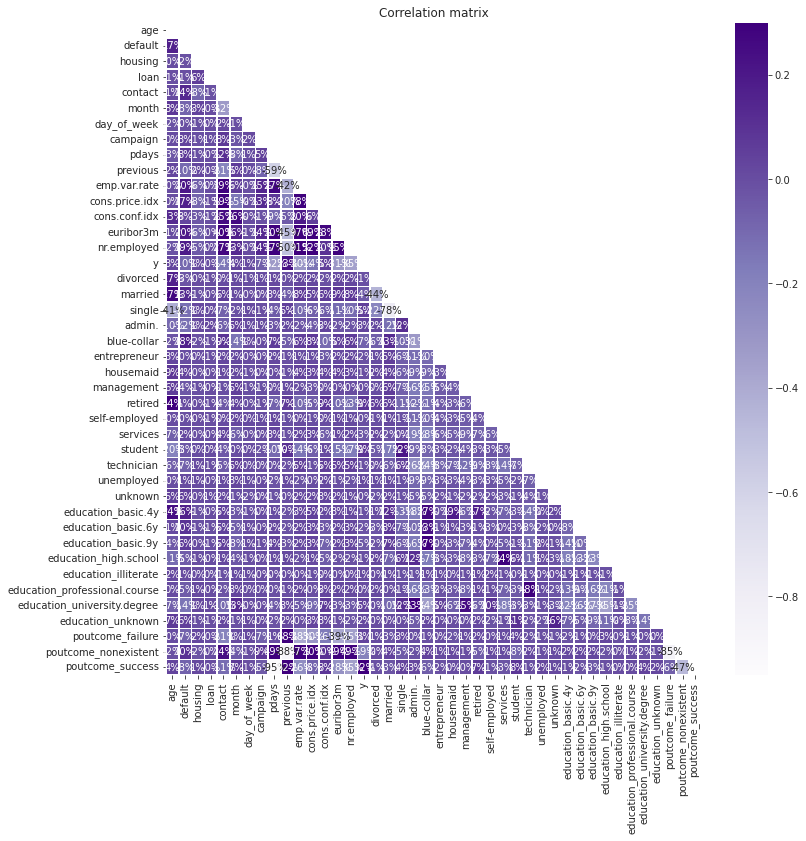

In [ ]:
mask = np.zeros_like(df_standard_scale.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('ticks'):
    f, ax = plt.subplots(figsize=(12,12))
    ax = sns.heatmap(df.corr(method ='pearson'), mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False,cmap='Purples')
    plt.title('Correlation matrix')

In [ ]:
df_correlations = df_standard_scale.corr().copy()
for x in df_correlations.columns:
    print(x)
    print(df_correlations[x].sort_values(ascending=False)[1:])
    print("\n")

age
retired                          0.440772
married                          0.271596
education_basic.4y               0.244079
divorced                         0.166125
default                          0.165019
cons.conf.idx                    0.129372
housemaid                        0.085403
month                            0.077265
education_unknown                0.069485
management                       0.062040
unknown                          0.047773
poutcome_success                 0.035626
entrepreneur                     0.031213
y                                0.030399
previous                         0.024365
education_illiterate             0.017007
euribor3m                        0.010767
education_basic.6y               0.009897
contact                          0.007021
campaign                         0.004594
education_professional.course    0.002054
cons.price.idx                   0.000857
emp.var.rate                    -0.000371
self-employed                 

# Modeling

In [ ]:
X = df.drop(labels='y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_quantiles = df_quantiles.drop(labels='y', axis=1)
y_quantiles = df_quantiles['y']
X_quantiles_train, X_quantiles_test, y_quantiles_train, y_quantiles_test = train_test_split(X_quantiles, y_quantiles, test_size=0.3, random_state=0)

X_standard_scale = df_standard_scale.drop(labels='y', axis=1)
y_standard_scale = df_standard_scale['y']
X_standard_scale_train, X_standard_scale_test, y_standard_scale_train, y_standard_scale_test = \
    train_test_split(X_standard_scale, y_standard_scale, test_size=0.3, random_state=0)

Logistics Regression

In [ ]:
C_set = [0.01, 1, 1000]

numerical columns not preprocessed

In [ ]:
for c in C_set:
    lr = LogisticRegression(C=c, max_iter=10000)
    lr.fit(X_train, y_train)
    print("for C = " + str(c))
    print("Train - Accuracy :", metrics.accuracy_score(y_train, lr.predict(X_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_train, lr.predict(X_train)))
    print("Test - Accuracy :", metrics.accuracy_score(y_test, lr.predict(X_test)))
    print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_test, lr.predict(X_test)))

for C = 0.01
Train - Accuracy : 0.9000034684887794
Train - Confusion matrix :
 [[25312   267]
 [ 2616   636]]
Test - Accuracy : 0.8990046127700898
Test - Confusion matrix :
 [[10842   127]
 [ 1121   267]]
for C = 1
Train - Accuracy : 0.8998647289376018
Train - Confusion matrix :
 [[25309   270]
 [ 2617   635]]
Test - Accuracy : 0.8981953548595938
Test - Confusion matrix :
 [[10836   133]
 [ 1125   263]]
for C = 1000
Train - Accuracy : 0.8999687836009851
Train - Confusion matrix :
 [[25283   296]
 [ 2588   664]]
Test - Accuracy : 0.898761835396941
Test - Confusion matrix :
 [[10832   137]
 [ 1114   274]]


numerical columns preprocessed using quantalization

In [ ]:
for c in C_set:
    lr = LogisticRegression(C=c, max_iter=10000)
    lr.fit(X_quantiles_train, y_quantiles_train)
    print("for C = " + str(c))
    print("Train - Accuracy :", metrics.accuracy_score(y_quantiles_train, lr.predict(X_quantiles_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_quantiles_train, lr.predict(X_quantiles_train)))
    print("Test - Accuracy :", metrics.accuracy_score(y_quantiles_test, lr.predict(X_quantiles_test)))
    print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_quantiles_test, lr.predict(X_quantiles_test)))

for C = 0.01
Train - Accuracy : 0.8991363462939197
Train - Confusion matrix :
 [[25342   237]
 [ 2671   581]]
Test - Accuracy : 0.897952577486445
Test - Confusion matrix :
 [[10859   110]
 [ 1151   237]]
for C = 1
Train - Accuracy : 0.8995525649474524
Train - Confusion matrix :
 [[25281   298]
 [ 2598   654]]
Test - Accuracy : 0.8994092417253379
Test - Confusion matrix :
 [[10838   131]
 [ 1112   276]]
for C = 1000
Train - Accuracy : 0.899517880059658
Train - Confusion matrix :
 [[25276   303]
 [ 2594   658]]
Test - Accuracy : 0.8993283159342883
Test - Confusion matrix :
 [[10835   134]
 [ 1110   278]]


numerical columns preprocessed using standardization with the function provided by sklearn

In [ ]:
for c in C_set:
    lr = LogisticRegression(C=c, max_iter=10000)
    lr.fit(X_standard_scale_train, y_standard_scale_train)
    print("for C = " + str(c))
    print("Train - Accuracy :", metrics.accuracy_score(y_standard_scale_train, lr.predict(X_standard_scale_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_standard_scale_train, lr.predict(X_standard_scale_train)))
    print("Test - Accuracy :", metrics.accuracy_score(y_standard_scale_test, lr.predict(X_standard_scale_test)))
    print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_standard_scale_test, lr.predict(X_standard_scale_test)))

for C = 0.01
Train - Accuracy : 0.9000728382643682
Train - Confusion matrix :
 [[25309   270]
 [ 2611   641]]
Test - Accuracy : 0.8992473901432386
Test - Confusion matrix :
 [[10845   124]
 [ 1121   267]]
for C = 1
Train - Accuracy : 0.900315632478929
Train - Confusion matrix :
 [[25245   334]
 [ 2540   712]]
Test - Accuracy : 0.9000566480537348
Test - Confusion matrix :
 [[10817   152]
 [ 1083   305]]
for C = 1000
Train - Accuracy : 0.900315632478929
Train - Confusion matrix :
 [[25245   334]
 [ 2540   712]]
Test - Accuracy : 0.9000566480537348
Test - Confusion matrix :
 [[10816   153]
 [ 1082   306]]


Decision Tree


In [ ]:
Crit =["gini", "entropy"]
min_samples_split_number = [2, 4, 8]

numerical columns not preprocessed

In [ ]:
for min_samples_split_n in min_samples_split_number:
  print("min_samples_split = " + str(min_samples_split_n))
  for crit in Crit:
    clf = tree.DecisionTreeClassifier(random_state=0, criterion=crit, min_samples_split = min_samples_split_n)
    clf.fit(X_train, y_train)
    print("citerion " + crit)
    print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_train, clf.predict(X_train)))
    print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
    print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_test, clf.predict(X_test)))

min_samples_split = 2
citerion gini
Train - Accuracy : 0.9950400610454025
Train - Confusion matrix :
 [[25573     6]
 [  137  3115]]
Test - Accuracy : 0.8391195273933802
Test - Confusion matrix :
 [[9930 1039]
 [ 949  439]]
citerion entropy
Train - Accuracy : 0.9950400610454025
Train - Confusion matrix :
 [[25573     6]
 [  137  3115]]
Test - Accuracy : 0.8464837743788945
Test - Confusion matrix :
 [[9991  978]
 [ 919  469]]
min_samples_split = 4
citerion gini
Train - Accuracy : 0.9712115431306579
Train - Confusion matrix :
 [[25405   174]
 [  656  2596]]
Test - Accuracy : 0.8536861697823096
Test - Confusion matrix :
 [[10106   863]
 [  945   443]]
citerion entropy
Train - Accuracy : 0.9763449065242273
Train - Confusion matrix :
 [[25433   146]
 [  536  2716]]
Test - Accuracy : 0.8565185724690458
Test - Confusion matrix :
 [[10138   831]
 [  942   446]]
min_samples_split = 8
citerion gini
Train - Accuracy : 0.9491866393812216
Train - Confusion matrix :
 [[25265   314]
 [ 1151  2101]]
T

numerical columns preprocessed using quantalization

In [ ]:
for min_samples_split_n in min_samples_split_number:
  print("min_samples_split = " + str(min_samples_split_n))
  for crit in Crit:
      clf = tree.DecisionTreeClassifier(random_state=0, criterion=crit, min_samples_split = min_samples_split_n)
      clf.fit(X_quantiles_train, y_quantiles_train)
      print("citerion " + crit)
      print("Train - Accuracy :", metrics.accuracy_score(y_quantiles_train, clf.predict(X_quantiles_train)))
      print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_quantiles_train, clf.predict(X_quantiles_train)))
      print("Test - Accuracy :", metrics.accuracy_score(y_quantiles_test, clf.predict(X_quantiles_test)))
      print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_quantiles_test, clf.predict(X_quantiles_test)))

min_samples_split = 2
citerion gini
Train - Accuracy : 0.9914675176025806
Train - Confusion matrix :
 [[25566    13]
 [  233  3019]]
Test - Accuracy : 0.8408189690054221
Test - Confusion matrix :
 [[9951 1018]
 [ 949  439]]
citerion entropy
Train - Accuracy : 0.9914675176025806
Train - Confusion matrix :
 [[25566    13]
 [  233  3019]]
Test - Accuracy : 0.8451080359310512
Test - Confusion matrix :
 [[10006   963]
 [  951   437]]
min_samples_split = 4
citerion gini
Train - Accuracy : 0.9657660157469391
Train - Confusion matrix :
 [[25382   197]
 [  790  2462]]
Test - Accuracy : 0.8551428340212025
Test - Confusion matrix :
 [[10143   826]
 [  964   424]]
citerion entropy
Train - Accuracy : 0.9703444209357983
Train - Confusion matrix :
 [[25403   176]
 [  679  2573]]
Test - Accuracy : 0.8529578376628631
Test - Confusion matrix :
 [[10124   845]
 [  972   416]]
min_samples_split = 8
citerion gini
Train - Accuracy : 0.9431514689049981
Train - Confusion matrix :
 [[25249   330]
 [ 1309  1943

numerical columns preprocessed using standardization with the function provided by sklearn

In [ ]:
for min_samples_split_n in min_samples_split_number:
  print("min_samples_split = " + str(min_samples_split_n))
  for crit in Crit:
      clf = tree.DecisionTreeClassifier(random_state=0, criterion=crit, min_samples_split = min_samples_split_n)
      clf.fit(X_standard_scale_train, y_standard_scale_train)
      print("citerion " + crit)
      print("Train - Accuracy :", metrics.accuracy_score(y_standard_scale_train, clf.predict(X_standard_scale_train)))
      print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_standard_scale_train, clf.predict(X_standard_scale_train)))
      print("Test - Accuracy :", metrics.accuracy_score(y_standard_scale_test, clf.predict(X_standard_scale_test)))
      print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_standard_scale_test, clf.predict(X_standard_scale_test)))

min_samples_split = 2
citerion gini
Train - Accuracy : 0.9950400610454025
Train - Confusion matrix :
 [[25573     6]
 [  137  3115]]
Test - Accuracy : 0.8391195273933802
Test - Confusion matrix :
 [[9930 1039]
 [ 949  439]]
citerion entropy
Train - Accuracy : 0.9950400610454025
Train - Confusion matrix :
 [[25573     6]
 [  137  3115]]
Test - Accuracy : 0.8464837743788945
Test - Confusion matrix :
 [[9990  979]
 [ 918  470]]
min_samples_split = 4
citerion gini
Train - Accuracy : 0.9712115431306579
Train - Confusion matrix :
 [[25405   174]
 [  656  2596]]
Test - Accuracy : 0.8536861697823096
Test - Confusion matrix :
 [[10106   863]
 [  945   443]]
citerion entropy
Train - Accuracy : 0.9763449065242273
Train - Confusion matrix :
 [[25433   146]
 [  536  2716]]
Test - Accuracy : 0.8566804240511451
Test - Confusion matrix :
 [[10138   831]
 [  940   448]]
min_samples_split = 8
citerion gini
Train - Accuracy : 0.9491866393812216
Train - Confusion matrix :
 [[25265   314]
 [ 1151  2101]]
T

k-Nearest Neighbors

In [ ]:
number_neighbors = [2, 5, 10]
algorithm_set = ['auto', 'ball_tree', 'kd_tree', 'brute']

numerical columns not preprocessed

In [ ]:
for x in number_neighbors:
  for alg in algorithm_set:
    print("n_neighbors: " + str(x) + " algorithm: " + alg)
    clf = KNeighborsClassifier(n_neighbors=x, p=2, metric='minkowski', algorithm=alg)
    clf.fit(X_train, y_train)
    print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_train, clf.predict(X_train)))
    print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
    print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_test, clf.predict(X_test)))
    print("\n")

n_neighbors: 2 algorithm: auto
Train - Accuracy : 0.9241441503936735
Train - Confusion matrix :
 [[25575     4]
 [ 2183  1069]]
Test - Accuracy : 0.8896172210083354
Test - Confusion matrix :
 [[10752   217]
 [ 1147   241]]


n_neighbors: 2 algorithm: ball_tree
Train - Accuracy : 0.9242482050570566
Train - Confusion matrix :
 [[25575     4]
 [ 2180  1072]]
Test - Accuracy : 0.8900218499635834
Test - Confusion matrix :
 [[10755   214]
 [ 1145   243]]


n_neighbors: 2 algorithm: kd_tree
Train - Accuracy : 0.9242135201692623
Train - Confusion matrix :
 [[25575     4]
 [ 2181  1071]]
Test - Accuracy : 0.8899409241725338
Test - Confusion matrix :
 [[10755   214]
 [ 1146   242]]


n_neighbors: 2 algorithm: brute
Train - Accuracy : 0.9241441503936735
Train - Confusion matrix :
 [[25575     4]
 [ 2183  1069]]
Test - Accuracy : 0.8896172210083354
Test - Confusion matrix :
 [[10752   217]
 [ 1147   241]]


n_neighbors: 5 algorithm: auto
Train - Accuracy : 0.9133571502896188
Train - Confusion matr

numerical columns preprocessed using quantalization

In [ ]:
for x in number_neighbors:
  for alg in algorithm_set:
    print("n_neighbors: " + str(x) + " algorithm: " + alg)
    clf = KNeighborsClassifier(n_neighbors=x, p=2, metric='minkowski', algorithm=alg)
    clf.fit(X_quantiles_train, y_quantiles_train)
    print("Train - Accuracy :", metrics.accuracy_score(y_quantiles_train, clf.predict(X_quantiles_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_quantiles_train, clf.predict(X_quantiles_train)))
    print("Test - Accuracy :", metrics.accuracy_score(y_quantiles_test, clf.predict(X_quantiles_test)))
    print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_quantiles_test, clf.predict(X_quantiles_test)))
    print("\n")

n_neighbors: 2 algorithm: auto
Train - Accuracy : 0.9233810828621969
Train - Confusion matrix :
 [[25571     8]
 [ 2201  1051]]
Test - Accuracy : 0.8864611151574007
Test - Confusion matrix :
 [[10773   196]
 [ 1207   181]]


n_neighbors: 2 algorithm: ball_tree
Train - Accuracy : 0.9232770281988137
Train - Confusion matrix :
 [[25569    10]
 [ 2202  1050]]
Test - Accuracy : 0.8863801893663511
Test - Confusion matrix :
 [[10773   196]
 [ 1208   180]]


n_neighbors: 2 algorithm: kd_tree
Train - Accuracy : 0.9233117130866082
Train - Confusion matrix :
 [[25569    10]
 [ 2201  1051]]
Test - Accuracy : 0.8862992635753014
Test - Confusion matrix :
 [[10772   197]
 [ 1208   180]]


n_neighbors: 2 algorithm: brute
Train - Accuracy : 0.9233810828621969
Train - Confusion matrix :
 [[25571     8]
 [ 2201  1051]]
Test - Accuracy : 0.8864611151574007
Test - Confusion matrix :
 [[10773   196]
 [ 1207   181]]


n_neighbors: 5 algorithm: auto
Train - Accuracy : 0.9119350698900489
Train - Confusion matr

numerical columns preprocessed using standardization with the function provided by sklearn

In [ ]:
for x in number_neighbors:
  for alg in algorithm_set:
    print("n_neighbors: " + str(x) + " algorithm: " + alg)
    clf = KNeighborsClassifier(n_neighbors=x, p=2, metric='minkowski', algorithm=alg)
    clf.fit(X_standard_scale_train, y_standard_scale_train)
    print("Train - Accuracy :", metrics.accuracy_score(y_standard_scale_train, clf.predict(X_standard_scale_train)))
    print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_standard_scale_train, clf.predict(X_standard_scale_train)))
    print("Test - Accuracy :", metrics.accuracy_score(y_standard_scale_test, clf.predict(X_standard_scale_test)))
    print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_standard_scale_test, clf.predict(X_standard_scale_test)))
    print("\n")

n_neighbors: 2 algorithm: auto
Train - Accuracy : 0.9249765877007388
Train - Confusion matrix :
 [[25575     4]
 [ 2159  1093]]
Test - Accuracy : 0.890507404709881
Test - Confusion matrix :
 [[10769   200]
 [ 1153   235]]


n_neighbors: 2 algorithm: ball_tree
Train - Accuracy : 0.9252193819152995
Train - Confusion matrix :
 [[25575     4]
 [ 2152  1100]]
Test - Accuracy : 0.890507404709881
Test - Confusion matrix :
 [[10768   201]
 [ 1152   236]]


n_neighbors: 2 algorithm: kd_tree
Train - Accuracy : 0.9251846970275052
Train - Confusion matrix :
 [[25575     4]
 [ 2153  1099]]
Test - Accuracy : 0.8906692562919802
Test - Confusion matrix :
 [[10770   199]
 [ 1152   236]]


n_neighbors: 2 algorithm: brute
Train - Accuracy : 0.9249765877007388
Train - Confusion matrix :
 [[25575     4]
 [ 2159  1093]]
Test - Accuracy : 0.890507404709881
Test - Confusion matrix :
 [[10769   200]
 [ 1153   235]]


n_neighbors: 5 algorithm: auto
Train - Accuracy : 0.9129756165238806
Train - Confusion matrix 

MLPClassifier

In [ ]:
solvers = ['lbfgs', 'sgd', 'adam']

numerical columns not preprocessed

In [ ]:
for x in solvers:
  print("solver: " + x)
  clf = MLPClassifier(random_state=1, max_iter=1000, solver=x).fit(X_train, y_train)
  print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
  print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_train, clf.predict(X_train)))
  print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
  print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_test, clf.predict(X_test)))
  print('\n')

solver: lbfgs


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train - Accuracy : 0.8872047448926502
Train - Confusion matrix :
 [[25579     0]
 [ 3252     0]]
Test - Accuracy : 0.8876750020231448
Test - Confusion matrix :
 [[10969     0]
 [ 1388     0]]


solver: sgd
Train - Accuracy : 0.8872047448926502
Train - Confusion matrix :
 [[25579     0]
 [ 3252     0]]
Test - Accuracy : 0.8876750020231448
Test - Confusion matrix :
 [[10969     0]
 [ 1388     0]]


solver: adam
Train - Accuracy : 0.8835975165620339
Train - Confusion matrix :
 [[24322  1257]
 [ 2099  1153]]
Test - Accuracy : 0.8862992635753014
Test - Confusion matrix :
 [[10471   498]
 [  907   481]]




numerical columns preprocessed using quantalization



In [ ]:
for x in solvers:
  print("solver: " + x)
  clf = MLPClassifier(random_state=1, max_iter=1000, solver=x).fit(X_quantiles_train, y_quantiles_train)
  print("Train - Accuracy :", metrics.accuracy_score(y_quantiles_train, clf.predict(X_quantiles_train)))
  print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_quantiles_train, clf.predict(X_quantiles_train)))
  print("Test - Accuracy :", metrics.accuracy_score(y_quantiles_test, clf.predict(X_quantiles_test)))
  print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_quantiles_test, clf.predict(X_quantiles_test)))
  print('\n')

solver: lbfgs


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train - Accuracy : 0.9068363913842739
Train - Confusion matrix :
 [[25200   379]
 [ 2307   945]]
Test - Accuracy : 0.8967386906207008
Test - Confusion matrix :
 [[10749   220]
 [ 1056   332]]


solver: sgd
Train - Accuracy : 0.8988588671915646
Train - Confusion matrix :
 [[25394   185]
 [ 2731   521]]
Test - Accuracy : 0.8969814679938496
Test - Confusion matrix :
 [[10875    94]
 [ 1179   209]]


solver: adam
Train - Accuracy : 0.9048940376677882
Train - Confusion matrix :
 [[25270   309]
 [ 2433   819]]
Test - Accuracy : 0.8960103585012543
Test - Confusion matrix :
 [[10776   193]
 [ 1092   296]]




numerical columns preprocessed using standardization with the function provided by sklearn

In [ ]:
for x in solvers:
  print("solver: " + x)
  clf = MLPClassifier(random_state=1, max_iter=1000, solver=x).fit(X_standard_scale_train, y_standard_scale_train)
  print("Train - Accuracy :", metrics.accuracy_score(y_standard_scale_train, clf.predict(X_standard_scale_train)))
  print("Train - Confusion matrix :\n", metrics.confusion_matrix(y_standard_scale_train, clf.predict(X_standard_scale_train)))
  print("Test - Accuracy :", metrics.accuracy_score(y_standard_scale_test, clf.predict(X_standard_scale_test)))
  print("Test - Confusion matrix :\n", metrics.confusion_matrix(y_standard_scale_test, clf.predict(X_standard_scale_test)))
  print('\n')

solver: lbfgs


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train - Accuracy : 0.9222711664527765
Train - Confusion matrix :
 [[25155   424]
 [ 1817  1435]]
Test - Accuracy : 0.8906692562919802
Test - Confusion matrix :
 [[10628   341]
 [ 1010   378]]


solver: sgd
Train - Accuracy : 0.9015296035517325
Train - Confusion matrix :
 [[25211   368]
 [ 2471   781]]
Test - Accuracy : 0.8995710933074371
Test - Confusion matrix :
 [[10796   173]
 [ 1068   320]]


solver: adam
Train - Accuracy : 0.9198432243071694
Train - Confusion matrix :
 [[24947   632]
 [ 1679  1573]]
Test - Accuracy : 0.8893744436351866
Test - Confusion matrix :
 [[10521   448]
 [  919   469]]


